In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

listings = pd.read_csv('listings2.csv')
reviews = pd.read_csv('reviews2.csv')

/var/folders/22/kk3jgz8n1yn0zwh0vft67d040000gn/T/ipykernel_41578/4292999687.py:3: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('listings2.csv')


In [ ]:
merged_data = pd.merge(listings, reviews, left_on='id', right_on='listing_id')

merged_data.to_csv('merged_listings_reviews.csv', index=False)

In [2]:
df = pd.read_csv('merged_listings_reviews.csv')

/var/folders/22/kk3jgz8n1yn0zwh0vft67d040000gn/T/ipykernel_38563/4260272891.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_listings_reviews.csv')


In [6]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
listings2 = listings.drop(['scrape_id', 'neighbourhood_group_cleansed', 'calendar_updated'], axis=1)
numeric_columns = listings2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

In [51]:
listings_more_than_30_bedrooms = listings[listings['bedrooms'] > 30]
print(listings_more_than_30_bedrooms)

index_to_drop = listings[listings['bedrooms'] > 30].index

listings = listings.drop(index_to_drop)

            id                            listing_url       scrape_id  \
9814  47814357  https://www.airbnb.com/rooms/47814357  20240428134723   

     last_scraped           source                     name  \
9814   2024-04-29  previous scrape  Bed & Bike Buenos Aires   

                                            description  \
9814  Bed & Bike Buenos Aires is the first accommoda...   

                                  neighborhood_overview  \
9814  Ubicacion centrica a solo metros de las lineas...   

                                            picture_url    host_id  ...  \
9814  https://a0.muscache.com/pictures/ddc38da5-b64c...  385252055  ...   

     review_scores_communication review_scores_location review_scores_value  \
9814                         NaN                    NaN                 NaN   

     license instant_bookable calculated_host_listings_count  \
9814     NaN                f                              1   

     calculated_host_listings_count_entire_homes 

Quitamos el listing https://www.airbnb.com/rooms/47814357?source_impression_id=p3_1718216376_P3mv-OidFVzH4AKj ya que es un hostel, y no una habitacion o una propiedad

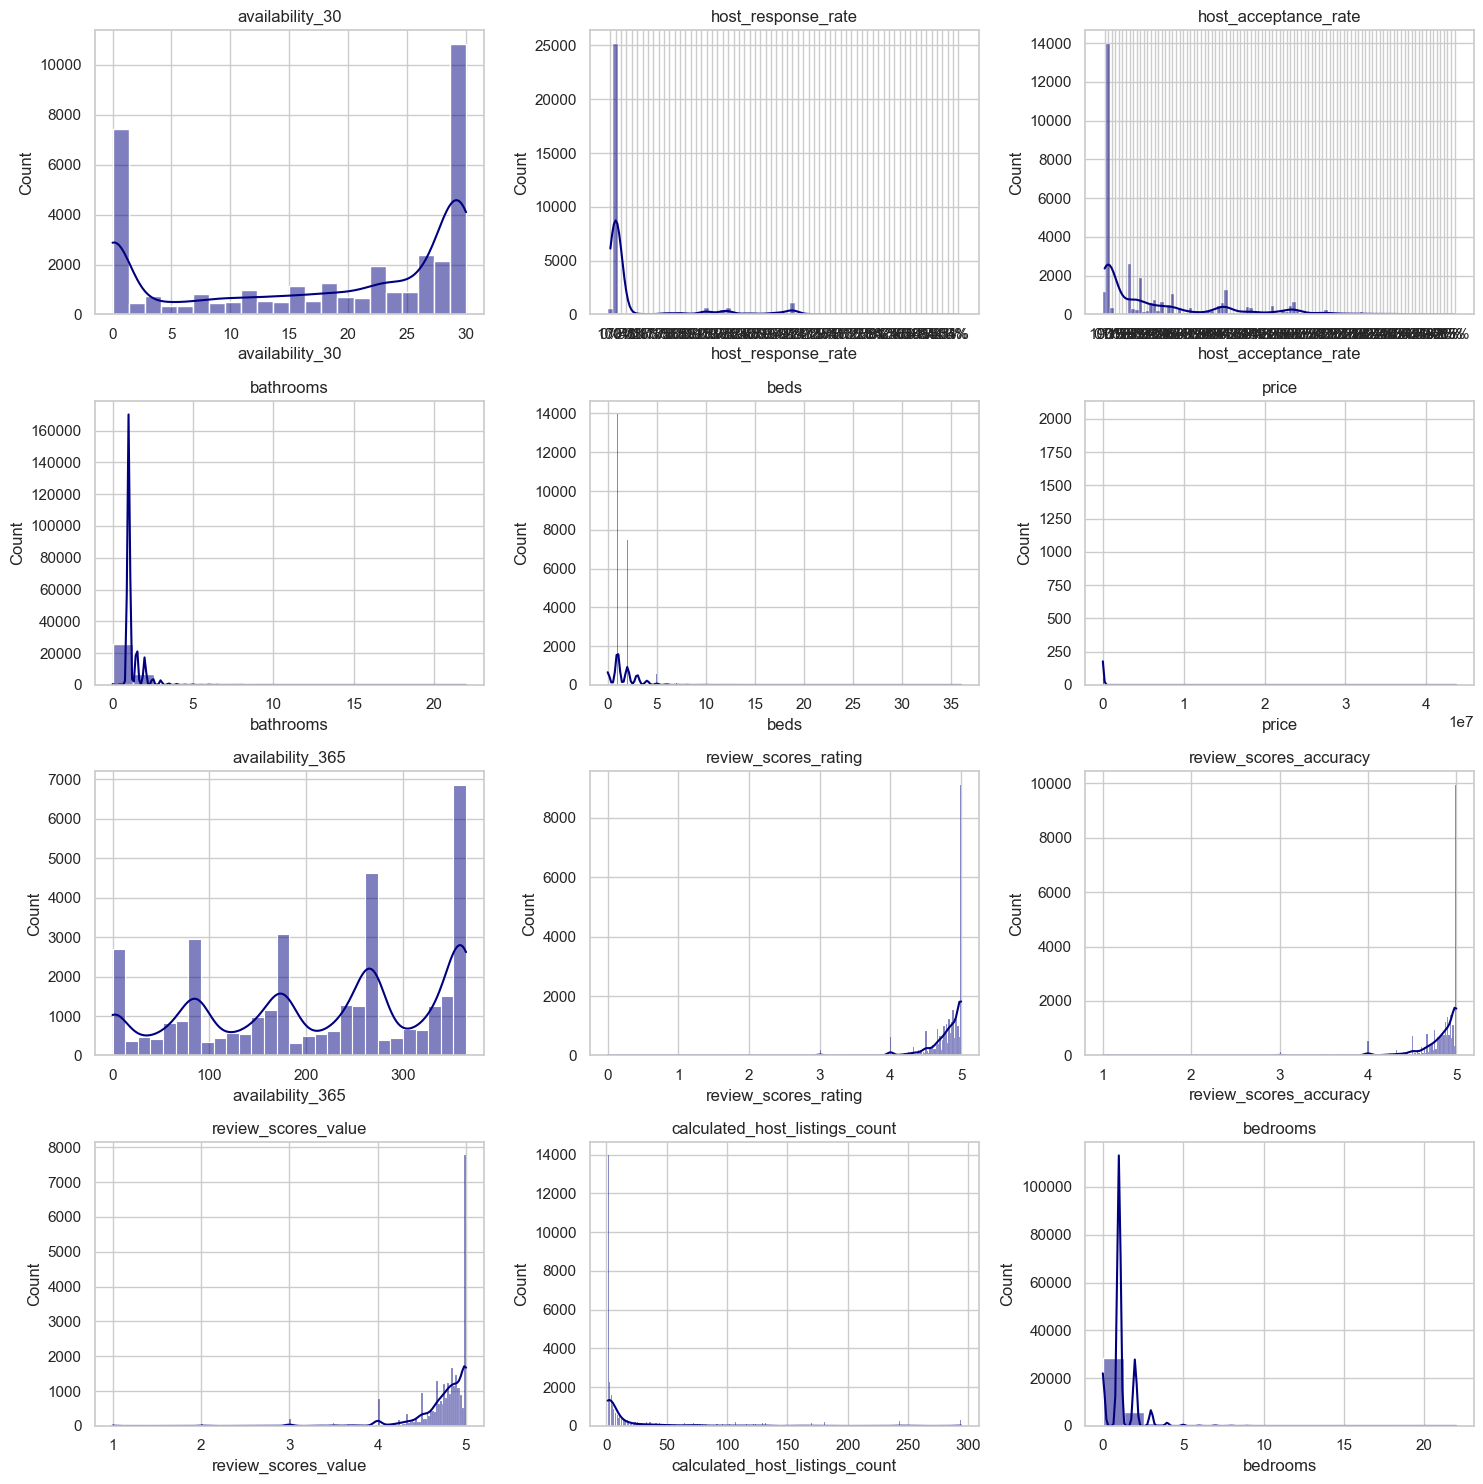

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['availability_30', 'host_response_rate', 'host_acceptance_rate',
             'bathrooms', 'beds', 'price', 'availability_365',
             'review_scores_rating', 'review_scores_accuracy', 'review_scores_value',
             'calculated_host_listings_count', 'bedrooms']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=listings, x=var, kde=True, color='navy')
    plt.title(var)

plt.tight_layout()

plt.show()

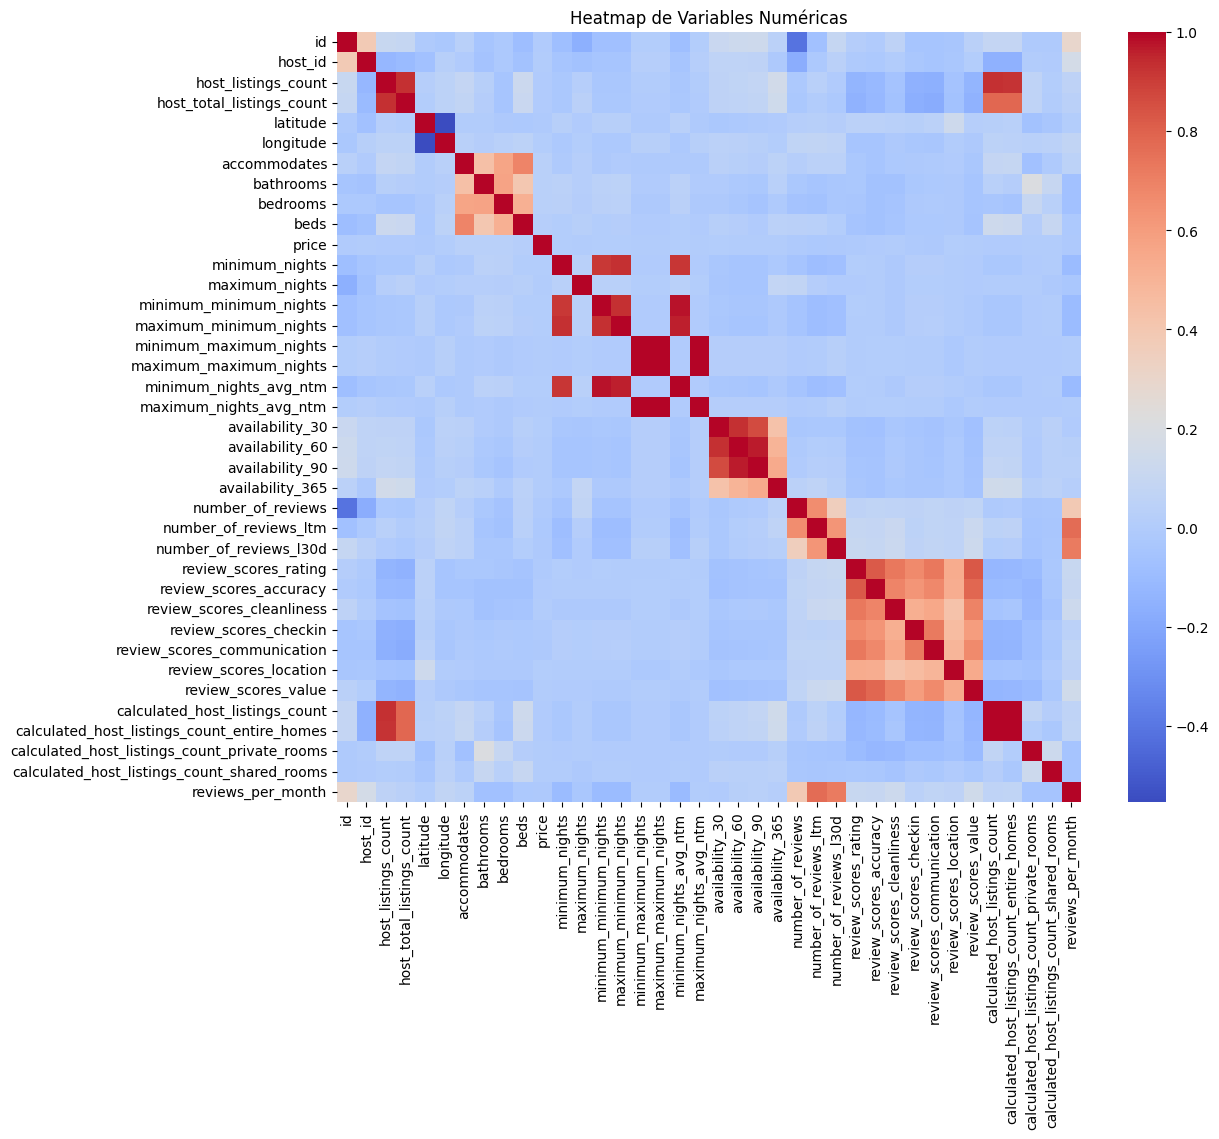

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap de Variables Numéricas')
plt.show()

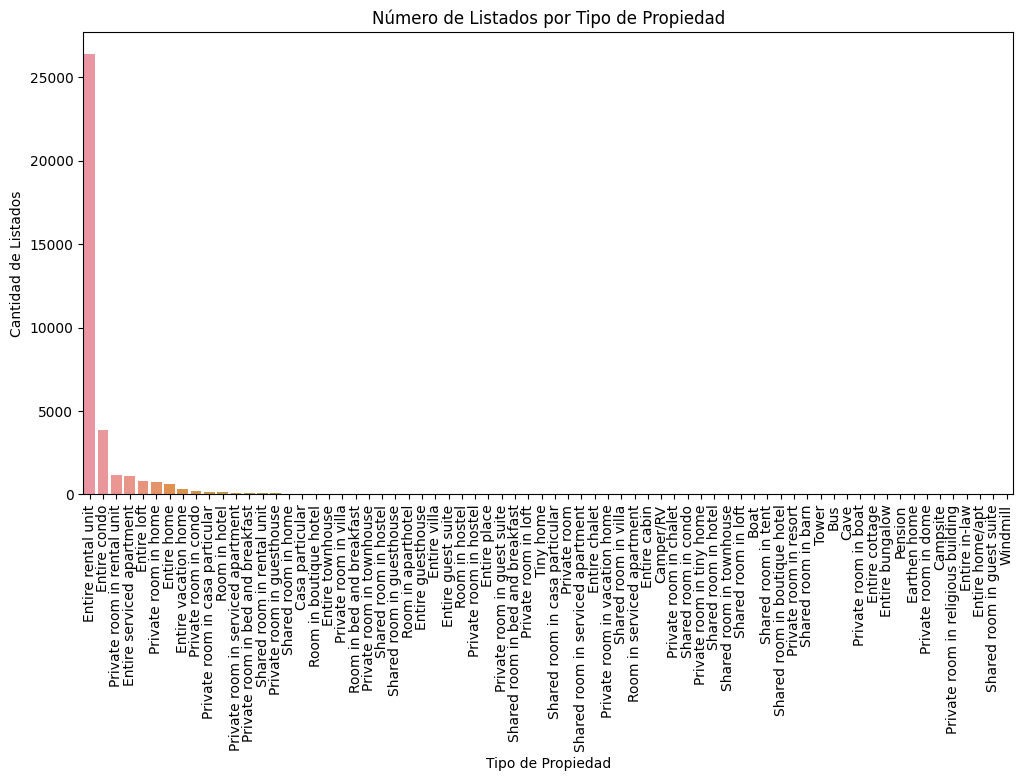

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=listings, x='property_type', order=listings['property_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Número de Listados por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad de Listados')
plt.show()

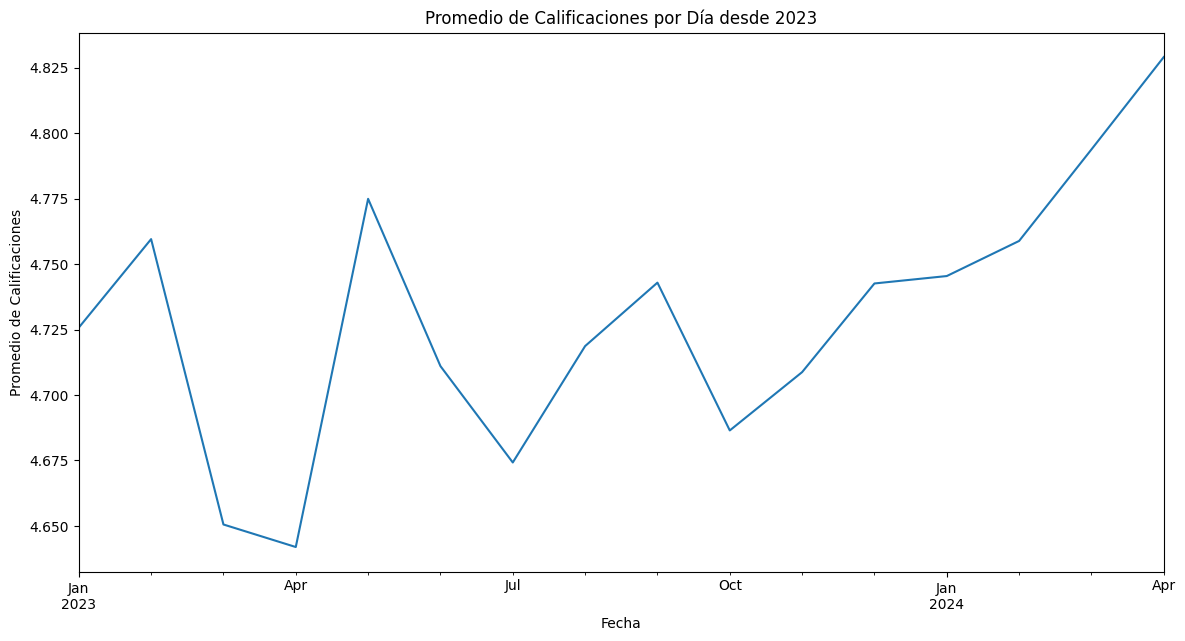

In [7]:
listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')

filtered_listings = listings[listings['last_review'].dt.year >= 2023]

daily_avg_ratings = filtered_listings.resample('M', on='last_review')['review_scores_rating'].mean()

plt.figure(figsize=(14, 7))
daily_avg_ratings.plot()
plt.title('Promedio de Calificaciones por Día desde 2023')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Calificaciones')
plt.show()

/Users/azulmakk/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


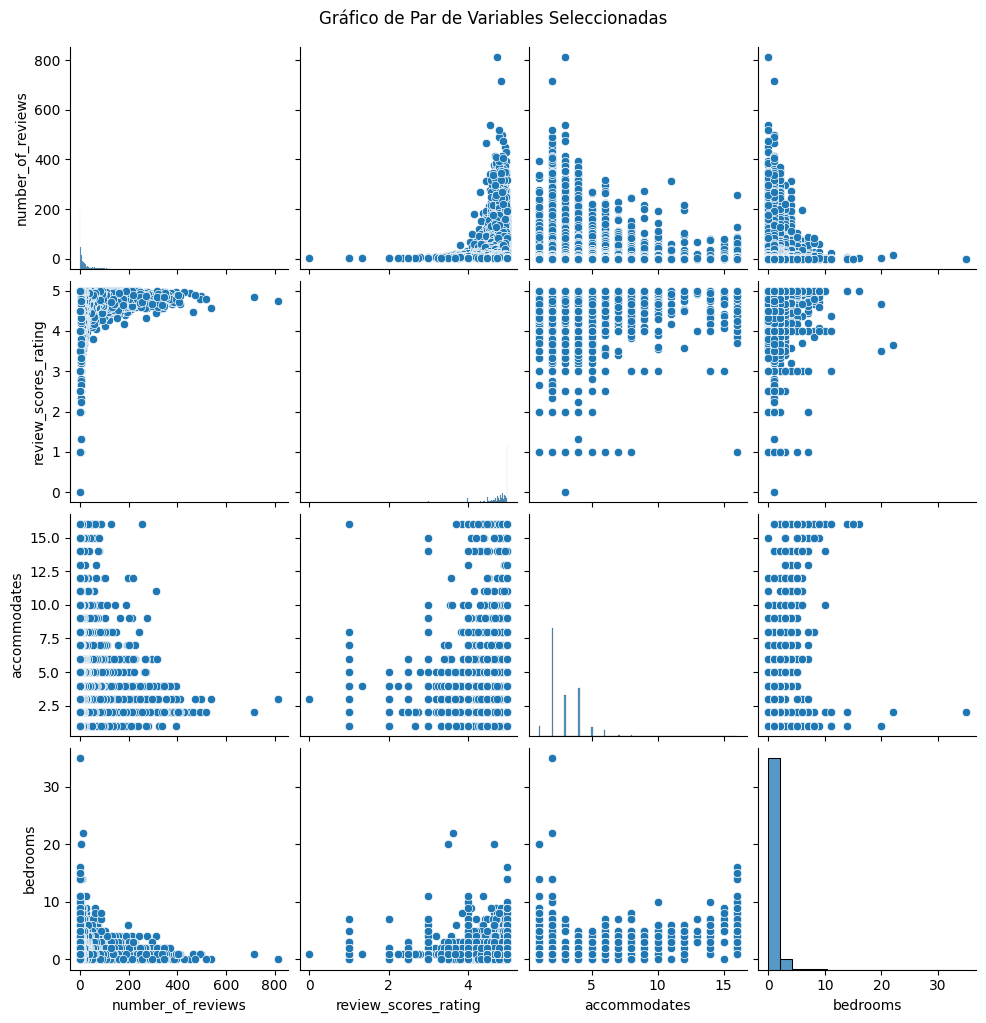

In [8]:
sns.pairplot(listings[['price', 'number_of_reviews', 'review_scores_rating', 'accommodates', 'bedrooms']])
plt.suptitle('Gráfico de Par de Variables Seleccionadas', y=1.02)
plt.show()

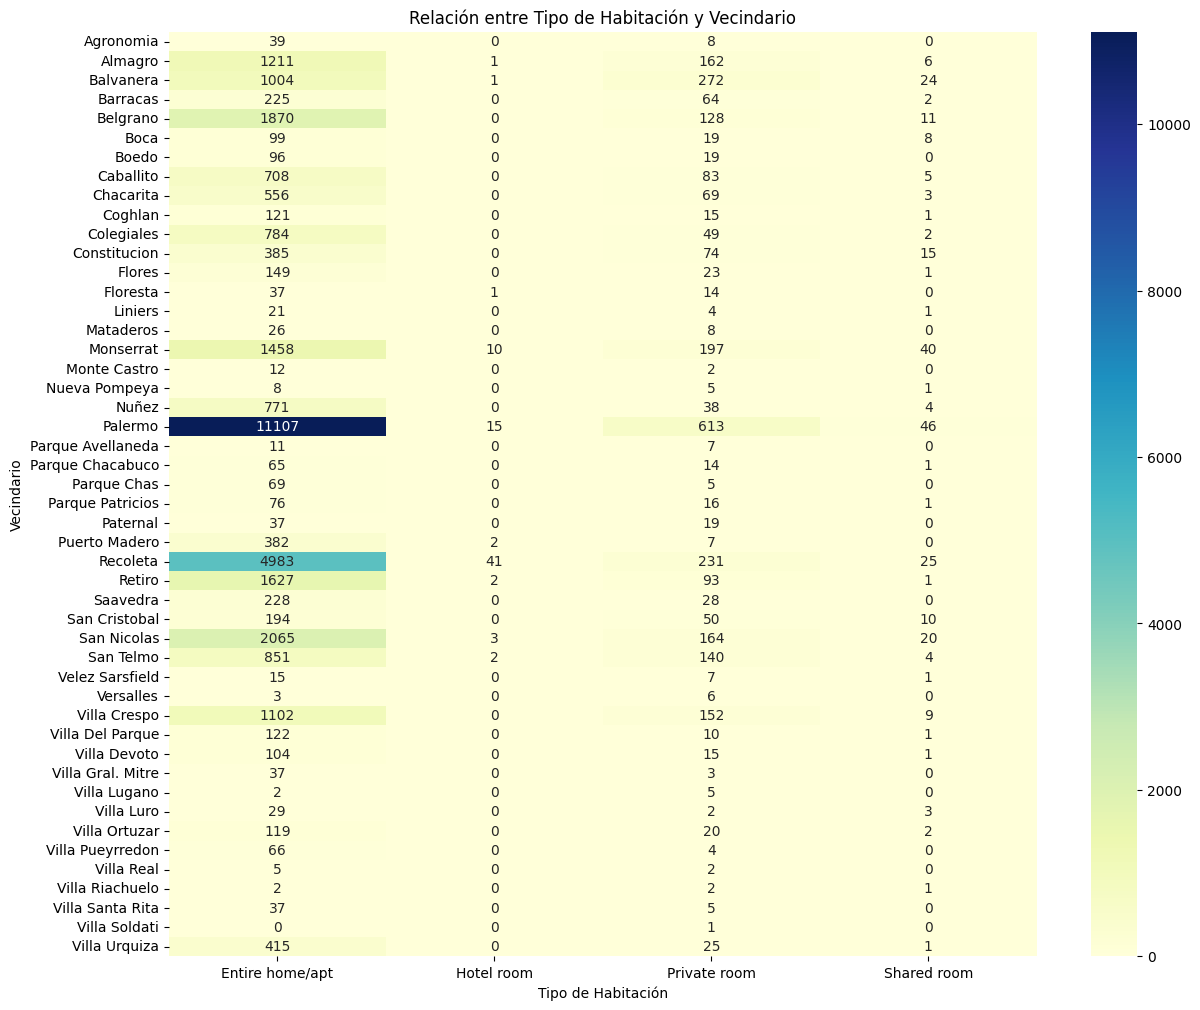

In [10]:
room_neighborhood_counts = listings.pivot_table(index='neighbourhood_cleansed', columns='room_type', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 12))
sns.heatmap(room_neighborhood_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Tipo de Habitación y Vecindario')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Vecindario')
plt.show()

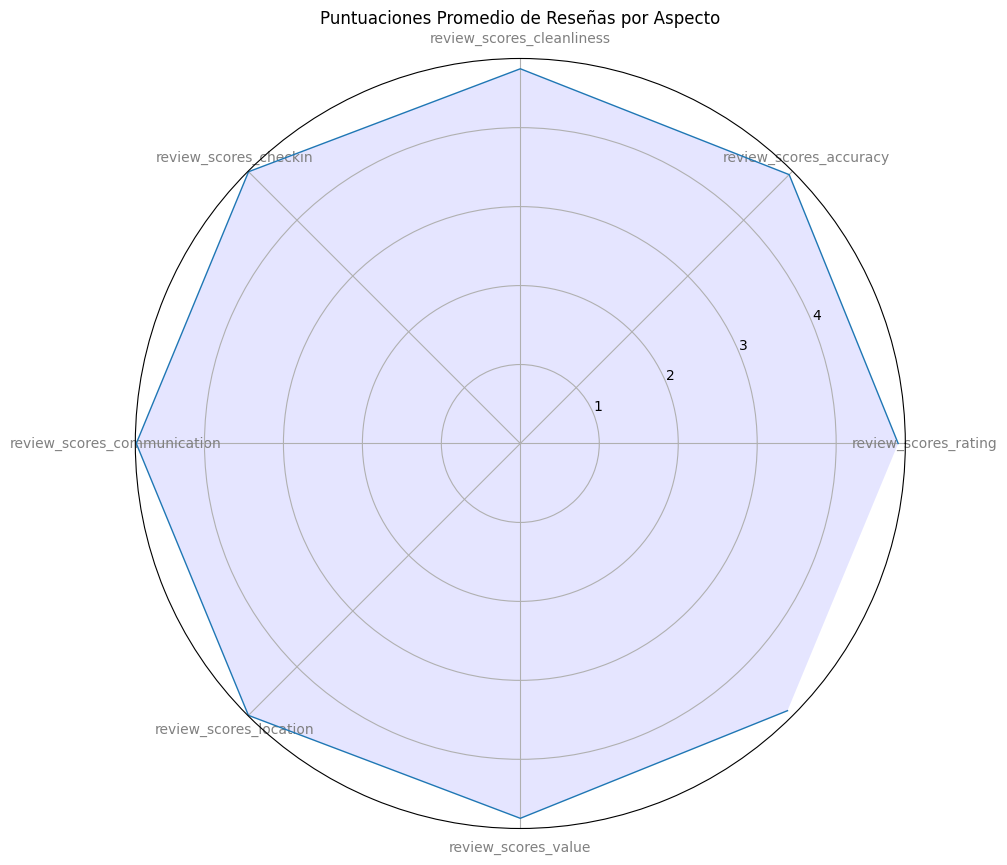

In [19]:
review_scores = listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

average_scores = review_scores.mean()

average_scores = average_scores.fillna(average_scores.mean())

categories = list(average_scores.index)
values = list(average_scores.values)

categories.append(categories[0])
values.append(values[0])

plt.figure(figsize=(10, 10))
angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories[:-1], color='grey', size=10)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
plt.title('Puntuaciones Promedio de Reseñas por Aspecto')
plt.show()

In [31]:
latitudes = listings['latitude']
longitudes = listings['longitude']
print(len(latitudes))
print(len(longitudes))


36561
36561


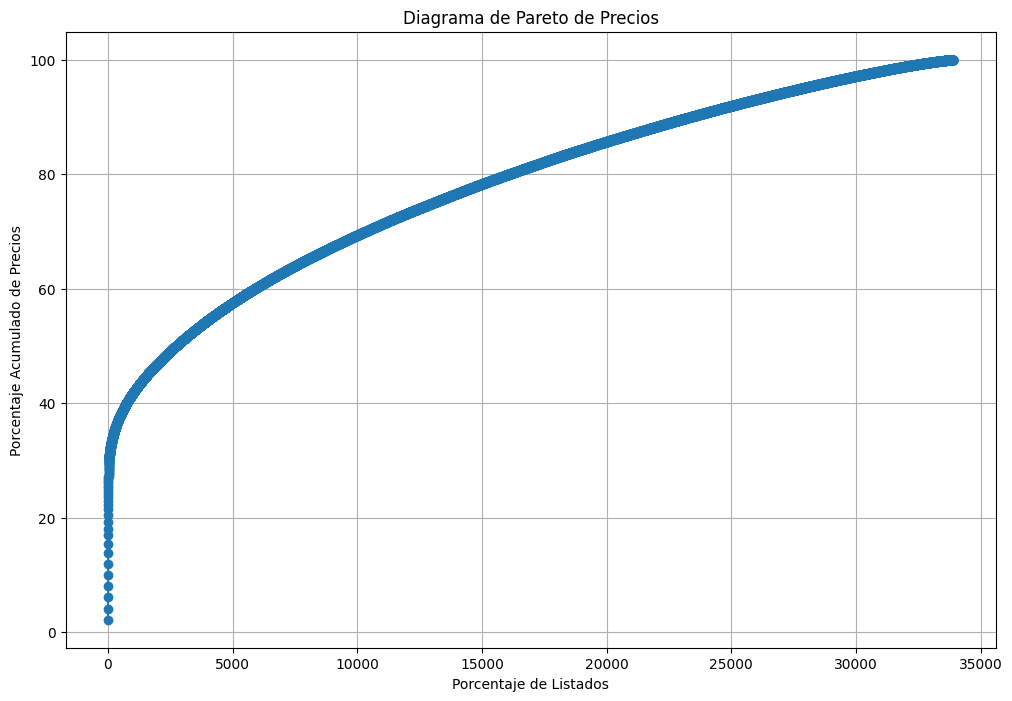

In [44]:
sorted_prices = listings['price'].sort_values(ascending=False)
cumulative_percentage = sorted_prices.cumsum() / sorted_prices.sum() * 100
plt.figure(figsize=(12, 8))
plt.plot(cumulative_percentage.values, marker='o')
plt.title('Diagrama de Pareto de Precios')
plt.xlabel('Porcentaje de Listados')
plt.ylabel('Porcentaje Acumulado de Precios')
plt.grid(True)
plt.show()

In [43]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

heat_data = [[row['latitude'], row['longitude']] for index, row in listings.iterrows()]
HeatMap(heat_data).add_to(mapa)

mapa.save('mapa_de_calor.html')

In [5]:
print(listings.head(5))

       id                          listing_url       scrape_id last_scraped  \
0  111501  https://www.airbnb.com/rooms/111501  20240428134723   2024-04-29   
1  111934  https://www.airbnb.com/rooms/111934  20240428134723   2024-04-29   
2   11508   https://www.airbnb.com/rooms/11508  20240428134723   2024-04-29   
3  117548  https://www.airbnb.com/rooms/117548  20240428134723   2024-04-29   
4   14222   https://www.airbnb.com/rooms/14222  20240428134723   2024-04-29   

        source                                               name  \
0  city scrape          Sunny Apartment Palermo Boulevard Cerviño   
1  city scrape                      Bright Studio at Palermo Soho   
2  city scrape                 Amazing Luxurious Apt-Palermo Soho   
3  city scrape  Palermo, Buenos Aires: Complete flat: "Alma Mia".   
4  city scrape       RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES   

                                         description  \
0  Discover your perfect temporary home in Buenos...  

In [54]:
print(reviews.head(5))

   listing_id       id        date  reviewer_id reviewer_name  \
0       11508  1615861  2012-07-02       877808       Charlie   
1       11508  3157005  2012-12-26       656077        Shaily   
2       11508  3281011  2013-01-05      2835998       Michiel   
3       11508  6050019  2013-07-28      4600436          Tara   
4       11508  9328455  2013-12-22      3130017         Simon   

                                            comments  
0  Amazing place!\r<br/>\r<br/>Location: short wa...  
1  Really enjoyed Candela's recommendations and q...  
2  Candela and her colleague were very attentive ...  
3  The apartment was in a beautiful, modern build...  
4  My stay at Candela's apartment was very enjoya...  


In [4]:
print(df.columns)

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [3]:
print(df.head(5))

     id_x                          listing_url     scrape_id last_scraped  \
0  111501  https://www.airbnb.com/rooms/111501  2.024043e+13   2024-04-29   
1  111501  https://www.airbnb.com/rooms/111501  2.024043e+13   2024-04-29   
2  111501  https://www.airbnb.com/rooms/111501  2.024043e+13   2024-04-29   
3  111501  https://www.airbnb.com/rooms/111501  2.024043e+13   2024-04-29   
4  111501  https://www.airbnb.com/rooms/111501  2.024043e+13   2024-04-29   

        source                                       name  \
0  city scrape  Sunny Apartment Palermo Boulevard Cerviño   
1  city scrape  Sunny Apartment Palermo Boulevard Cerviño   
2  city scrape  Sunny Apartment Palermo Boulevard Cerviño   
3  city scrape  Sunny Apartment Palermo Boulevard Cerviño   
4  city scrape  Sunny Apartment Palermo Boulevard Cerviño   

                                         description  \
0  Discover your perfect temporary home in Buenos...   
1  Discover your perfect temporary home in Buenos...   
2 